# IMAGE ENCRYPTION USING AES

- All numbers used to represent the pixels are encrypted and is later decrypted using AES (Advanced Encryption Standard)
- Source AES Algorithm : https://cryptobook.nakov.com/symmetric-key-ciphers/aes-encrypt-decrypt-examples

In [1]:
from PIL import Image
import numpy as np
from IPython import display

import pyaes
import pbkdf2
import os
import secrets

import time

### STORING PIXELS OF IMAGES IN A NUMPY ARRAY

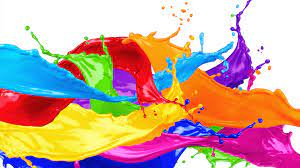

In [2]:
np_image=np.array(Image.open("res/image.jpg")) # PIXELS ARE STORED IN A NP-ARRAY
display.Image("res/image.jpg")

In [3]:
print(np_image)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 204]
  [240 250 225]
  [226 229 255]
  ...
  [215   7 143]
  [215   7 143]
  [215   7 143]]

 [[215 216 185]
  [254 255 218]
  [248 255 239]
  ...
  [217   9 145]
  [217   9 145]
  [217   9 145]]

 [[255 248 255]
  [240 244 211]
  [249 255 216]
  ...
  [218  10 146]
  [218  10 146]
  [218  10 146]]]


In [4]:
np_encrypted=np_image.astype(bytes) #NP-ARRAY TO STORE THE ENCRYPTED PIXELS AS BYTES

### ENCRYPTION USING AES

In [5]:
password="aespython"
passwordSalt=os.urandom(16)
key=pbkdf2.PBKDF2(password, passwordSalt).read(32) #KEY - PRE-SHARED WITH THE RECEIVER
iv=secrets.randbits(256) #INITIALIZATION VECTOR - PRE-SHARED WITH THE RECEIVER

for i in range(0,len(np_image)): #ENCRYPTION
    for j in range(0,len(np_image[i])):
        for k in range(0,len(np_image[i][j])):
            aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
            np_encrypted[i][j][k]=aes.encrypt(str(np_image[i][j][k]))

In [6]:
print(np_encrypted)

[[[b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  ...
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']]

 [[b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  ...
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']]

 [[b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  [b'SsH' b'SsH' b'SsH']
  ...
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']
  [b'SsN' b'SsN' b'SsN']]

 ...

 [[b'SsO' b'SsN' b'SvO']
  [b'SrK' b'SsK' b'StN']
  [b'StM' b'StB' b'SsN']
  ...
  [b'SwN' b'V' b'PrH']
  [b'SwN' b'V' b'PrH']
  [b'SwN' b'V' b'PrH']]

 [[b'SwN' b'SwM' b'P~N']
  [b'SsO' b'SsN' b'SwC']
  [b'SrC' b'SsN' b'SuB']
  ...
  [b'SwL' b'X' b'PrN']
  [b'SwL' b'X' b'PrN']
  [b'SwL' b'X' b'PrN']]

 [[b'SsN' b'SrC' b'SsN']
  [b'SrK' b'SrO' b'SwJ']
  [b'SrB' b'SsN' b'SwM']
  ...
  [b'SwC' b'Pv' b'PrM']
  [b'SwC' b'Pv' b'PrM']
  [b'SwC' b'Pv' b'PrM']]]


In [7]:
np_decrypted=np_image.copy() #NP-ARRAY TO STORE THE DECRYPTED PIXEL VALUES

### DECRYPTION USING AES

In [8]:
for i in range(0,len(np_encrypted)): #DECRYPTION
    for j in range(0,len(np_encrypted[i])):
        for k in range(0,len(np_encrypted[i][j])):
            aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
            np_decrypted[i][j][k]=int(aes.decrypt(np_encrypted[i][j][k]))

In [9]:
print(np_decrypted)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 204]
  [240 250 225]
  [226 229 255]
  ...
  [215   7 143]
  [215   7 143]
  [215   7 143]]

 [[215 216 185]
  [254 255 218]
  [248 255 239]
  ...
  [217   9 145]
  [217   9 145]
  [217   9 145]]

 [[255 248 255]
  [240 244 211]
  [249 255 216]
  ...
  [218  10 146]
  [218  10 146]
  [218  10 146]]]


### SAVING THE IMAGE

In [10]:
decrypted_img=Image.fromarray(np_decrypted)

decrypted_img.save("res/decrypted.jpg")

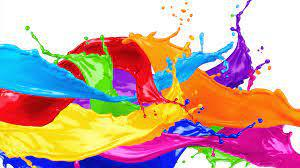

In [11]:
display.Image("res/decrypted.jpg")

### AVERAGE RUNNING TIME

- A